In [2]:
import time
import queue
import asyncio
import matplotlib.pyplot as plt

In [3]:
n = 50000
n_small = 100

In [4]:
# Test latency of for loop
start = time.time()
for i in range(n):
    pass
end = time.time()
print("For loop latency: ", end - start)

For loop latency:  0.00698089599609375


In [5]:
# Test latency of sleep
start = time.time()
for i in range(1000):
    time.sleep(0.0000000000000000000000000000000000000001)
end = time.time()
print("Sleep latency: ", end - start)

Sleep latency:  15.811418771743774


time elapsed: 0.17453408241271973


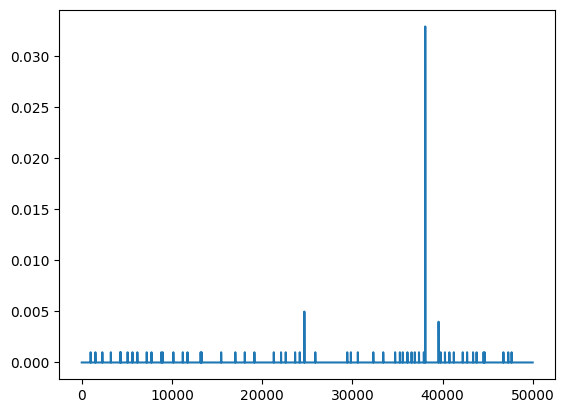

In [6]:
# Test latency of list append/pop
lst = []
def put():
    lst.append(1)
    return time.time()
def get():
    lst.pop(-1)
    return time.time()
start = time.time()
data = [-(put() - get()) for i in range(n)]
end = time.time()
print('time elapsed:', end - start)
plt.plot(data)

time elapsed: 0.4398324489593506


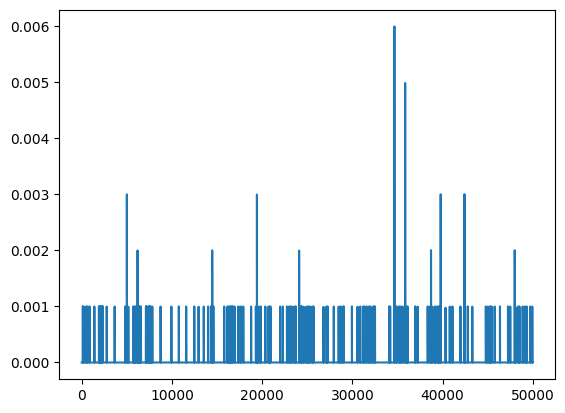

In [7]:
# Test latency of asyncio.Queue put/get

q = asyncio.Queue()
async def put():
    await q.put(1)
    return time.time()
async def get():
    await q.get()
    return time.time()
start = time.time()
data = [-(await put() - await get()) for i in range(n)]
end = time.time()
print('time elapsed:', end - start)
plt.plot(data)


time elapsed: 0.6639683246612549


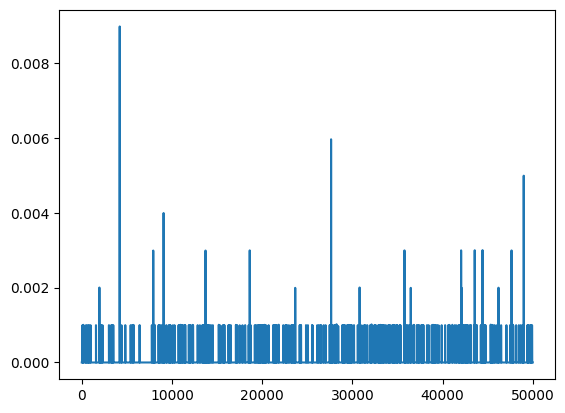

In [8]:
# Test latency of queue.Queue put/get
q = queue.Queue()
q.put(1)
def put():
    q.put(1)
    return time.time()
def get():
    q.get()
    return time.time()
start = time.time()
data = [-(put() - get()) for i in range(n)]
end = time.time()
print('time elapsed:', end - start)
plt.plot(data)
